# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [2]:
def create_pivot_table(df, ind, val, name, feature_name='percentage_ratio', aggf=['count', 'sum']):
    '''для построения сводных таблиц'''
    pivot_table_ = df.pivot_table(index=ind, values=val, aggfunc=aggf)
    pivot_table_[feature_name] = (pivot_table_['sum'] / pivot_table_['count']) * 100
    pivot_table_.reset_index(inplace=True)
    name_list = ['Всего кредитополучателей', 'Количество должников', 'Процент должников']
    name_list.insert(0, name)
    pivot_table_.columns = name_list
    return round(pivot_table_, 2)

In [3]:
try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [6]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [10]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [13]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [14]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [17]:
data.duplicated().sum()

71

In [18]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

----------
----------

### Шаг 3. Исследуйте данные и ответьте на вопросы

**сначала ещё немного обработки!**

отвечая на вопросы мы будем по ходу дела обрабатывать некоторые значения признаков. Какие-то раньше, какие-то чуть позже, так как их значения подходят для визуализации

**признаки education и education_id**

In [24]:
data.education.value_counts()

среднее                15075
высшее                  5227
неоконченное высшее      741
начальное                282
ученая степень             6
Name: education, dtype: int64

В данном исследовании мы их не рассматриваем, но они обязательно пригодятся нам в будущем. ```education```, по сути, дублирует текстовый признак ```education_id```, поэтому в таблице мы оставим только ```education_id```, а ```education``` перенесём в именную таблицу-справочник

In [25]:
education_catalog = data[['education', 'education_id']].drop_duplicates(keep='first').reset_index(drop=True)
data['education_id'] = data['education_id'].astype('category')
data = data.drop(columns='education')

In [26]:
# сохранить справочник education_catalog в файл
#education_catalog.to_csv('education_catalog.csv', index=False)

признак **income_type**

C ```income_type``` чуть интереснее. Сначала посмотрим на значения:

In [27]:
data.income_type.value_counts()

сотрудник          11015
компаньон           5047
пенсионер           3812
госслужащий         1451
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

на весь датафрейм всего 2 безработных, и предпринимателя, кто-то в декрете и целый студент. Удалять мы их не будем, так как что-то они да значат, но разбросаем их по другим категориям. Безработных и студентов в декрете к пенсионерам, предпринимателя к компаньонам

In [28]:
for i in ['безработный', 'в декрете', 'студент', 'предприниматель']:
    try:
        if i == 'предприниматель':
            data.loc[data['income_type'] == i, 'income_type'] = 'компаньон' 
        else:
            data.loc[data['income_type'] == i, 'income_type'] = 'пенсионер' 
    except IndexError as message:
        print(f'запредельный индекс! Описание ошибки:\n{message}')
    else:
        print('успешный успех')

успешный успех
успешный успех
успешный успех
успешный успех


In [29]:
data.income_type.value_counts()

сотрудник      11015
компаньон       5049
пенсионер       3816
госслужащий     1451
Name: income_type, dtype: int64

далее при помощи *LabelEncoder* из *sklearn.preprocessing* создадим цифровое представление признака ```income_type``` под названием ```income_type_id```, а сам ```income_type``` из датафрейма перенесём в свой справочник

In [30]:
data['income_type_id'] = LabelEncoder().fit_transform(data['income_type'])
income_type_catalog = data[['income_type', 'income_type_id']].drop_duplicates(keep='first').reset_index(drop=True)
data['income_type_id'] = data['income_type_id'].astype('category')
data = data.drop(columns='income_type')

In [31]:
# сохранить справочник income_type_catalog в файл
#income_type_catalog.to_csv('income_type_catalog.csv', index=False)

признак **gender**

In [32]:
data.gender.value_counts()

F      14092
M       7238
XNA        1
Name: gender, dtype: int64

хм, гендер XNA он такой один! наверняка это кто-то уникальный и крайне интересный, но сейчас он выбивается из общей статистики, поэтому самым простым решением будет добавиь его к одной из групп (добавим к female), а сам признак сделаем бинарной категориальной переменной, в которой:

- 0 = female
- 1 = male

In [33]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'F'
data['gender'] = (data['gender'] == 'M').astype(int)
data['gender'] = data['gender'].astype('category')

проверим, что получилось:

In [34]:
data.gender.value_counts()

0    14093
1     7238
Name: gender, dtype: int64

неравномерное распределение гендера, кстати, наводит на мысль, что и вся выборка в датафрейме может распределена неровно. Для более точного анализа неплохо было бы уточнить дополнительную инфрмацию по гендеру проверить одну из гипотез:
- женщины берут кредиты чаще мужчин
- в представленных данных недостаточно информации
- информации в данных достаточно, но есть ошибки в записи признака gender

признак ```purpose``` - с ним мы чуть ниже поработаем и только потом обработаем и уберём в именной в справочник

----------
----------

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

первым делом посмотрим на значение в колонке ```debt```, а то мы её раньше внимательно не изучали:

In [35]:
print(data['debt'].unique())

[0 1]


```debt``` содержит 2 значения:
- 1 - задолженность по возврату кредитов была
- 0 - задолженности не было

данные по количеству детей - неравномерная выборка, так как, очевидно, многодетных семей меньше, чем семей с одним ребёнком. Посмотрим, сколько их всего у нас

In [36]:
pt_children = create_pivot_table(data, ind=['children'], val='debt', name='Кол-во детей')
pt_children

,Кол-во детей,Всего кредитополучателей,Количество должников,Процент должников
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45
3,3,330,27,8.18
4,4,41,4,9.76
5,5,9,0,0.00


оказывается, бездетные семьи самые закредитованные) но эта информация нам пока мало помогла, поэтому дополнительно смотрим, а какая доля из них имела задолженности по возврату кредитов. 

И по доле проблемных заёмщиков становится очень похоже на то, что семьи с 4-мя детьми самые неблагонадёжные. Но это некорректный вывод, так как семей с 4-мя детьми в выборке слишком мало

кстати, а ведь группа бездетных самая большая! стоит рассмотреть её со всем сторон повнимательней, попробуем это сделать. Построим сводную таблицу

In [37]:
pt_family_status = create_pivot_table(data, ind=[data.loc[data['children'] == 0, 'family_status']], val='debt', 
                                      name='Семейное положение').sort_values(by='Семейное положение', ascending=False)
pt_family_status

,Семейное положение,Всего кредитополучателей,Количество должников,Процент должников
4,женат / замужем,7468,516,6.91
3,гражданский брак,2730,229,8.39
2,вдовец / вдова,847,53,6.26
1,в разводе,784,55,7.02
0,Не женат / не замужем,2262,210,9.28


на сводной таблице видим, что бездетные холостые и в гражданском браке клиенты - самые неблагонадёжные

для наглядности построим 2 графика и посмотрим на ту же информацию, но в графическом исполнении:

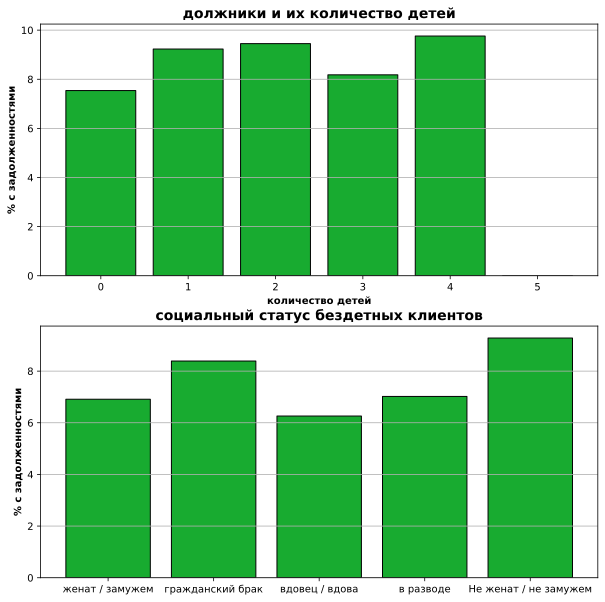

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax1, ax2 = ax.flatten()
ax1.bar(pt_children['Кол-во детей'], pt_children['Процент должников'], color='#18ab30', linewidth=1.0, edgecolor='k')
ax1.set_title('должники и их количество детей', fontweight='bold', fontsize=14)
ax1.set_xlabel('количество детей', fontweight='bold')
ax1.set_ylabel('% с задолженностями', fontweight='bold')
ax1.grid(axis='y')
ax2.bar(pt_family_status['Семейное положение'], pt_family_status['Процент должников'], 
        color='#18ab30', linewidth=1.0, edgecolor='k')
ax2.set_title('социальный статус бездетных клиентов', fontweight='bold', fontsize=14)
ax2.set_ylabel('% с задолженностями', fontweight='bold')
ax2.grid(axis='y')
fig.set_size_inches(10,10);

**Вывод:** гипотеза частично подтверждается и количество детей в семье влияет на погашение кредита в срок. Клиенты с детьми задерживают возвраты по кредитам чаще, чем бездетные клиенты. При этом клиенты с 3-мя детьми в сравнении с остальными клиентами с детьми несколько аккуратней в этом вопросе. Семьи с 5-ю детьми в список имевших задолженность не попали, но этот факт не показателен, так как для анализа их было слишком мало (всего 9) 

Отдельно стоит сказать о клиентах без детей - среди таких чаще всего не возвращают кредит в срок неженатые клиенты и клиенты, находящиеся в гражданском браке - эти категории клиентов резко выбиваются на фоне остальных и у них чаще возникают проблемы с погашением кредита в срок

----------
----------

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

посмотрим ещё раз, что там в семейном положении есть

In [39]:
data['family_status'].value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

In [40]:
data['family_status_id'].value_counts()

0    12261
1     4134
4     2796
3     1189
2      951
Name: family_status_id, dtype: int64

**наблюдение:** признак *family_status* - категориальная переменная, он полностью продублирован в столбце *family_status_id* и хранение его в датасете нецелесообразно. После всех наших "манипуляций" с поиском зависимости между семейным положением и возвратом кредита в срок, мы перенесём его в отдельный именной справочник

построим сводную таблицу

In [41]:
family_ratio = create_pivot_table(data, ind=['family_status'], val='debt', name='семейное положение').sort_values(
    by='семейное положение', ascending=False)
family_ratio

,семейное положение,Всего кредитополучателей,Количество должников,Процент должников
4,женат / замужем,12261,927,7.56
3,гражданский брак,4134,385,9.31
2,вдовец / вдова,951,63,6.62
1,в разводе,1189,84,7.06
0,Не женат / не замужем,2796,273,9.76


вот что мы видим - зависимость между семейным положением и возвратом кредита в срок есть - неженатые чаще не отдают кредит в срок, чего не скажешь о вдовцах и разведённых $\Rightarrow$ предположим, что, семейное положение имеет корреляцию с возрастом и он, в свою очередь, так же влияет на вероятность возврата кредита в срок. Для проверки этой гипотезы посмотрим подробнее на возраст.

Для этого:

- с помощью *groupby* получим среднее значение возраста по семейному статусу. Сохраним результат во временный DataFrame average_age

- при помощи *merge* объединим ```family_ratio``` и ```average_age```. Значения процентов округлим до 2-х знаков после запятой

In [42]:
average_age = pd.DataFrame(data.groupby('family_status')['dob_years'].mean()).astype('int')

In [43]:
marital_status_and_age = round(family_ratio.merge(average_age, on=family_ratio.index, \
                                                  how='left').sort_values('Процент должников', ascending=False), 2)
marital_status_and_age = marital_status_and_age.reset_index(drop=True)
marital_status_and_age.columns=['','семейное положение', 'Всего кредитополучателей', 
                                'Количество должников', 'Процент должников', 'возраст']
marital_status_and_age

,,семейное положение,Всего кредитополучателей,Количество должников,Процент должников,возраст
0,0,Не женат / не замужем,2796,273,9.76,43
1,3,гражданский брак,4134,385,9.31,45
2,4,женат / замужем,12261,927,7.56,38
3,1,в разводе,1189,84,7.06,42
4,2,вдовец / вдова,951,63,6.62,56


По сводной таблице видно, что больше всего проблем с возвратом кредитных средств в срок у незамужних, а так же мы определили, что эта группа клиентов - самая молодая, с увеличением же возраста меняется не только социальный статус заёмщиков, но и крепнет их надёжность. Это видно и на графике:

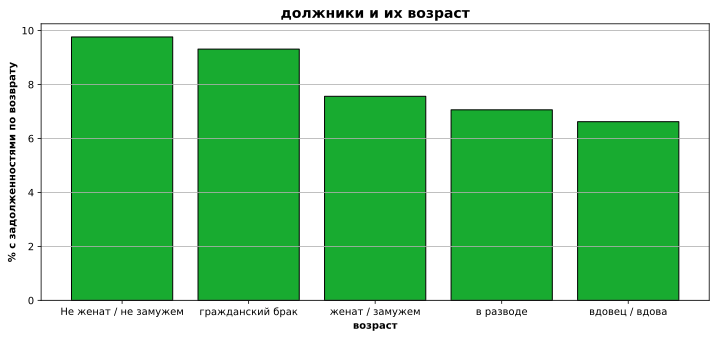

In [44]:
plt.bar(marital_status_and_age['семейное положение'], marital_status_and_age['Процент должников'],
        color='#18ab30', linewidth=1.0, edgecolor='k')
plt.xlabel('возраст', fontweight='bold')
plt.ylabel('% с задолженностями по возврату', fontweight='bold')
plt.title('должники и их возраст', fontweight='bold', fontsize=14)
plt.grid(axis='y');

**Вывод:** зависимость между семейным положением и возвратом кредита в срок есть - холостые люди чаще не отдают кредит в срок, они же - самая молодая группа из рассматриваемых. Вдовцы же, наоборот, самые примерные плательщики из рассматриваемых категорий, они же и самая старшая группа из всех. Возраст дисциплинирует :)

----------
----------

**P.S.:** а теперь, как и планировали, снесём столбец *family_status* в отдельный справочник

In [45]:
family_status_catalog = data[['family_status', 'family_status_id']].drop_duplicates(keep='first').reset_index(drop=True)
data['family_status_id'] = data['family_status_id'].astype('category')

вот такой справочник получился:

In [46]:
family_status_catalog

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


удалим колонку *family_status* из основного датафрейма

In [47]:
data = data.drop(columns='family_status')

In [48]:
# сохранить справочник family_status_catalog в файл
#family_status_catalog.to_csv('family_status_catalog.csv', index=False)

----------
----------

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

посмотрим на уровни дохода, что там есть, для этого построим сводную таблицу

In [49]:
income_ratio = create_pivot_table(data, ind=['total_income_category'], val='debt', name='Уровень дохода')
income_ratio

,Уровень дохода,Всего кредитополучателей,Количество должников,Процент должников
0,A,25,2,8.00
1,B,5014,354,7.06
2,C,15921,1353,8.50
3,D,349,21,6.02
4,E,22,2,9.09


по сводной таблице видно, что для эффективного анализа подходят только клиенты категорий B и C, так как по остальным категориям данных недостаточно для корректных выводов и мы будем получать большую статпогрешность

Визуализируем показатели на графике

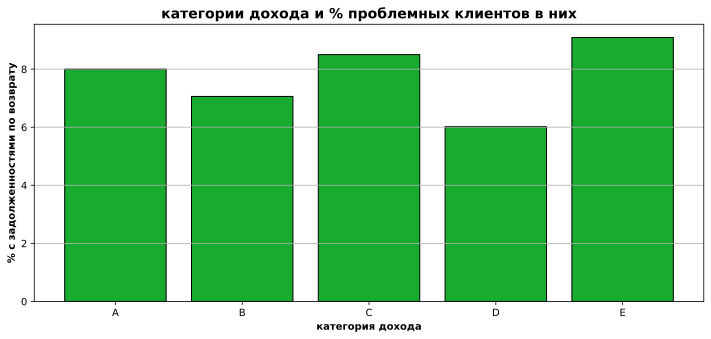

In [50]:
plt.bar(income_ratio['Уровень дохода'], income_ratio['Процент должников'], 
        color='#18ab30', linewidth=1.0, edgecolor='k')
plt.xlabel('категория дохода', fontweight='bold')
plt.ylabel('% с задолженностями по возврату', fontweight='bold')
plt.title('категории дохода и % проблемных клиентов в них', fontweight='bold', fontsize=14)
plt.grid(axis='y');

**Вывод:** корректные выводы можно сделать только по категориям B и C, так как в них достаточно данных для анализа.
По ним мы видим, что:
- среди клиентов из категории дохода B (от 200001 до 1000000) 7.06% задерживали погашение кредита в срок
- а из клиентов из категории C с доходом пониже (от 50001 до 200000) таких оказалось 8.5%

Сравнивая категории B и C мы можем сделать вывод о том, клиенты категории B более дисциплинированные и надёжные.

Для корректного же анализа клиентов категорий A D и E недостаточно данных. Для них  изучения необходимы дополнительные данные

----------
----------

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

изучим цели с возвратом в срок, для этого строим сводную таблицу

In [51]:
target_ratio = create_pivot_table(data, ind=['purpose_category'], val='debt', name='Цель кредита')
target_ratio

,Цель кредита,Всего кредитополучателей,Количество должников,Процент должников
0,операции с автомобилем,4279,400,9.35
1,операции с недвижимостью,10751,780,7.26
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91


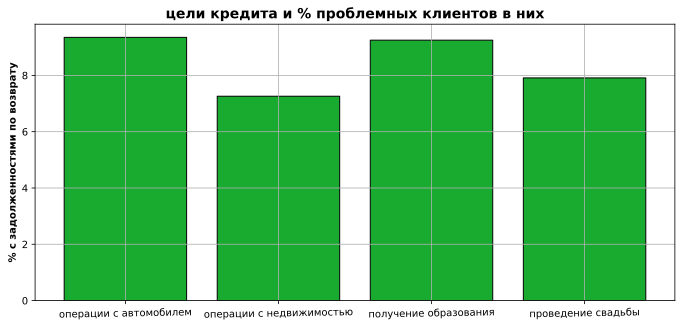

In [52]:
plt.figure(figsize=(11.5, 5))
plt.bar(target_ratio['Цель кредита'], target_ratio['Процент должников'], 
        color='#18ab30', linewidth=1.0, edgecolor='k')
plt.xticks(rotation=1)
plt.ylabel('% с задолженностями по возврату', fontweight='bold')
plt.title('цели кредита и % проблемных клиентов в них', fontweight='bold', fontsize=14)
plt.grid();

**Вывод:** цели кредита влияют на его возврат в срок и очень даже. По имеющимся данным мы можем сделать вывод о том, что клиенты, обращающиеся за кредитом с целью осуществления каких-либо операций с недвижимостью, более надёжны в вопросах выплат (7.26% проблемных клиентов), нежели те кленты, что берут кредит на опрерации с авто (9.35% проблемных клиентов). Высокий процент проблемных клиентов наблюдается и среди получающих кредит в образовательных целях (9.25%), с этими умниками надо быть настороже

----------
----------

**дополнительно о purpose** - это текстовые значения и их очень много. Мы с ними поработали, а значит можем перенести в отдельный именной справочник. Сами значения прогоним через LabelEncoder - этот алгоритм преобразует текстовые значения из ```purpose``` в числа, такими в таблице их и оставим, а признак ```purpose_category``` сделаем dummy-переменной (у него всего 4 значения, норм)

In [53]:
data['purpose_id'] = LabelEncoder().fit_transform(data['purpose'])
purpose_type_catalog = data[['purpose', 'purpose_id']].drop_duplicates(keep='first').reset_index(drop=True)
data['purpose_id'] = data['purpose_id'].astype('category')
data = data.drop(columns='purpose')

In [54]:
# # решение с помощью OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder 
# encoder = OneHotEncoder()
# Enc_label = LabelEncoder()
# data['purpose_category'] = Enc_label.fit_transform(data['purpose_category'])
# df = pd.DataFrame(encoder.fit_transform(data[['purpose_category']]).todense(), columns = Enc_label.classes_)

In [55]:
data = pd.concat([data, pd.get_dummies(data['purpose_category'])], axis=1)
data.drop(columns='purpose_category', inplace=True)

In [56]:
# сохранить справочник purpose_type_catalog в файл
#purpose_type_catalog.to_csv('purpose_type_catalog.csv', index=False)

и вот так теперь, после всех манипуляций, выглядит наш датафрейм. Теперь егоможно импользовать и для других исследований

In [57]:
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,debt,total_income,total_income_category,income_type_id,purpose_id,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
0,1,8437.673028,42,0,0,0,0,253875,B,3,18,0,1,0,0
1,1,4024.803754,36,1,0,0,0,112080,C,3,27,1,0,0,0
2,0,5623.422610,33,1,0,1,0,145885,C,3,18,0,1,0,0
3,3,4124.747207,32,1,0,1,0,267628,B,3,3,0,0,1,0
4,0,340266.072047,53,1,1,0,0,158616,C,2,37,0,0,0,1
5,0,926.185831,27,0,1,1,0,255763,B,1,18,0,1,0,0
6,0,2879.202052,43,0,0,0,0,240525,B,1,13,0,1,0,0
7,0,152.779569,50,1,0,1,0,135823,C,3,12,0,0,1,0
8,2,6929.865299,35,0,1,0,0,95856,C,3,10,0,0,0,1
9,0,2188.756445,41,1,0,1,0,144425,C,3,20,0,1,0,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   children                  21331 non-null  int64   
 1   days_employed             21331 non-null  float64 
 2   dob_years                 21331 non-null  int64   
 3   education_id              21331 non-null  category
 4   family_status_id          21331 non-null  category
 5   gender                    21331 non-null  category
 6   debt                      21331 non-null  int64   
 7   total_income              21331 non-null  int32   
 8   total_income_category     21331 non-null  object  
 9   income_type_id            21331 non-null  category
 10  purpose_id                21331 non-null  category
 11  операции с автомобилем    21331 non-null  uint8   
 12  операции с недвижимостью  21331 non-null  uint8   
 13  получение образования     21331 non-null  uint

----------
----------

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* пропуски по причинам своего появления в данных можно условно разделить на три категории:

* ```полностью случайные``` - это если вероятность встретить пропуск не зависит ни от каких других значений
* ```случайные``` - если вероятность появления пропуска зависит от других значений в данных, но не от значений собственного столбца. Такие лучше замещать дефолтными значениями
* ```неслучайные``` - если вероятность появления пропуска зависит от других значений в данных, в том числе и от значений собственного столбца

в наших данных пропуски были в признаках:

- ```days_employed``` - общий трудовой стаж в днях - 2174
- ```total_income``` - ежемесячный доход - 2174

вариантов возникновения пропусков в наших данных можно предположить два:

1) учитывая то, что мы исследуем данные о платёжеспособности клиентов, можно обратить внимание на то, что пропуски в данных есть в таких связанных между собой признаках, как стаж и доход. На этом основании можно предположить, что появление пропусков вызвано, в первую очередь, нежеланием потенциальных клиентов банка раскрывать всю финансовую информацию о себе. Это было бы логично для клиентов с высоким доходом.

Однако, если мы посмотрим, в каких именно типах занятости встречаются пропуски стажа и дохода: 

In [59]:
question = pd.read_csv('data.csv')
question.loc[(question['days_employed'].isna()) & (question['total_income'].isna()), 'income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

то увидим, что информацию о себе предпочли "утаить" не только категории сотрудников и компаньонов, но и пенсионеры с госслужащими. Пенсионеры любой страны меньше всего похожи на тех, кто имеет доход настолько высокий, что предпочитает его утаивать.

2) Плюс, если обратить внимание ещё и на тот факт, что данных в столбцах не хватает одинаковое количество и при этом заполнены все другие значения таблицы, то такой "ровный" пропуск данных может свидетельствовать о каком-то техническом сбое.

In [60]:
question.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Для более точного понимания природы пропусков правильным было бы запросить дополнительную информацию о них у сотрудников банка, отвечающих за сбор, хранение и передачу информации, так как потеря большого объёма важной для исследования информации может отражаться на результатах всего исследования.

----------
----------

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* пропуски для количественных переменных притяно заполнять т.н. ```характерными значениями``` - значениями, в целом характеризующими состояние выборки - это среднее или медианное значение. Но медиана в заполнении пропусков более предпочтительна, так как она, при наличии в выборке выбросов или резких отклонений, вернёт более объективный результат.

Проверим:

In [61]:
a = np.array([10, 10, 500000, 10, 20, 15, 10, 10, 10, 10])
print(f'выборка = {a}\nсреднее = {a.mean()}\nмедиана = {np.median(a)}')

выборка = [    10     10 500000     10     20     15     10     10     10     10]
среднее = 50010.5
медиана = 10.0


----------
----------

### Шаг 4: общий вывод.

мы исследовали статистику платёжеспособности клиентов банка по представленным данным с целью проверки гипотезы о том, что семейное положение и количество детей в семьях клиентов влияют на факты погашения клиентами кредитов в срок. Результаты проверки этих гипотез должны быть учтены при построении модели кредитного скоринга.

В ходе исследования данных было сделано:
1) технические детали
- найдены и заполнены пропуски в данных (total_income - медианным значением по типу занятости)
- найдены и откорректированы аномалии в данных (отрицательный трудовой стаж в days_employed)
- обработаны дубликаты и небольшие неточности в данных (такие как отрицательный возраст)
- произведена группировка кредитополучателей по уровню дохода с присвоением соответствующих категорий
- произведена группировка целей, на которые запрашиваются кредитные средства
- оптимизирован общий вид типов хранения данных с выделением некоторых категорий данных в отдельные именованные справочники 

2) детали исследования:
- рассмотрели зависимость между количеством детей клиента и возвратом кредита в срок 
- вычислили долю клиентов с детьми, имевших задолженность по возврату кредитов
- определили долю клиентов среди бездетных, имевших задолженность по возврату кредитов
- рассмотрели зависимость между возвратом кредита в срок и социальным статусом клиента 
- вычислили долю "проблемных" клиентов в разных социальных статусах
- на имеющихся данных изучили возможную связь между доходами клиентов и выплатами ими кредитов в срок
- изучили возможную взаимосвязь между целями, на которые запрашивается кредит, и вероятностью задержек кредитных выплат в требуемый срок.

В результате исследования были выявлены следующие закономерности:

**1)** гипотеза о влиянии семейного положения частично подтверждается и количество детей в семье действительно влияет на погашение кредита в срок. Клиенты с детьми задерживают возвраты по кредитам чаще, чем бездетные клиенты. 
- доля задерживающих платежи клиентов с детьми:

+ 1 ребёнок: 9.23%

+ 2 ребёнка: 9.45%

+ 3 ребёнка: 8.18%

+ 4 ребёнка: 9.76%
- доля задерживающих платежи клиентов без детей 7,5%

Клиенты с 5-ю детьми в исследовании не учтены, так как для анализа их было слишком мало (всего 9). 

Отдельно стоит сказать о клиентах без детей - среди таких чаще всего не возвращают кредит в срок неженатые клиенты (9.28%) и клиенты, находящиеся в гражданском браке (8,39%) - эти категории клиентов резко выбиваются на фоне остальных "бездетных" клиентов (женатые 6.91% и вдовцы 6.26%)

**2)** зависимость между семейным положением и возвратом кредита в срок тоже есть - холостые люди чаще не отдают кредит в срок (9.76%), они же - самая молодая группа из рассматриваемых (38 лет). 

Вдовцы же, наоборот, самые примерные плательщики из рассматриваемых категорий (6.62%), они же и самая старшая группа из всех (56 лет).

**3)** по зависимости между уровнем дохода и возвратом кредита в срок корректные выводы можно сделать только по клиентским категориям B и C, так как в них достаточно данных для анализа.
По ним мы видим, что:
- среди клиентов из категории дохода B (от 200001 до 1000000) 7.06% задерживали погашение кредита в срок
- а из клиентов из категории C с доходом пониже (от 50001 до 200000) таких оказалось 8.5%

Сравнивая категории B и C мы можем сделать вывод о том, клиенты категории B более дисциплинированные и надёжные.

Для корректного анализа клиентов категорий A D и E недостаточно данных и для них изучения необходима дополнительная информация

**4)** цели, для которых запрашивается кредит, влияют на его возврат в срок. По имеющимся данным мы можем сделать вывод о том, что:
- клиенты, обращающиеся за кредитом с целью осуществления каких-либо операций с недвижимостью, более надёжны в вопросах выплат (7.26% проблемных клиентов), в сравнении с
- клентами, что берут кредит на опрерации с авто (9.35% проблемных клиентов). 
- Высокий процент проблемных клиентов наблюдается и среди получающих кредит в образовательных целях (9.25%).

**что могло повлиять на результаты исследования:**
- непропорциональное гендерное соотношение в выборке: 14092 женщин против 7238 мужчин
- малое количество данных по клиентам с уровнями дохода A, D и E, по ним требуется отдельное исследование
- наличие пропусков в признаках days_employed и total_income - стоит уточнить природу происхождения этих пропусков

**В качестве рекомендаций:** 

- можно предложить другую категоризацию по доходам 
- исследовать другие признаки, рассчитать другие метрики (отношение дохода к сумме выплат и др.)
- в анкете сделать поля о доходе и стаже обязательными к заполнению
- добавить автопроверку на формат вводимых пользователем данных